In [36]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM,Dropout
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

In [37]:
df1 = pd.read_csv('/Users/psanchan/exp/capstone/data/Fine_2014_2019_Finger_millet_Min_Blore_Mysore.csv')
df1.head()

,district,commodity,Arrival Date,variety,Min_price
0,Mysore,Ragi (Finger Millet),02-01-14,Fine,1600
1,Mysore,Ragi (Finger Millet),03-01-14,Fine,2000
2,Mysore,Ragi (Finger Millet),04-01-14,Fine,1800
3,Mysore,Ragi (Finger Millet),07-01-14,Fine,2000
4,Mysore,Ragi (Finger Millet),08-01-14,Fine,2100


In [38]:
df1 = df1.drop([ 'commodity','variety'], axis=1)

In [39]:
df1['Arrival Date'] = pd.to_datetime(df1['Arrival Date'])

In [40]:
df1.head()

,district,Arrival Date,Min_price
0,Mysore,2014-02-01,1600
1,Mysore,2014-03-01,2000
2,Mysore,2014-04-01,1800
3,Mysore,2014-07-01,2000
4,Mysore,2014-08-01,2100


In [41]:
df1 = df1.set_index('Arrival Date')
df_Mysore = df1[df1['district'] =='Mysore'].drop([ 'district'], axis=1)
df_Blr = df1[df1['district'] =='Bangalore'].drop([ 'district'], axis=1)

In [42]:
df_Mysore.head()

,Min_price
Arrival Date,
2014-02-01,1600
2014-03-01,2000
2014-04-01,1800
2014-07-01,2000
2014-08-01,2100


In [43]:
df_Blr.head()

,Min_price
Arrival Date,
2014-02-01,1600
2014-03-01,2000
2014-04-01,1800
2014-07-01,2000
2014-08-01,2100


In [44]:
ndf_mys = df_Mysore.fillna(method='ffill')
ndf_blr = df_Blr.fillna(method='ffill')

In [45]:
ndf_mys.to_csv('/Users/psanchan/exp/capstone/data/Finger_millet_2006_2019_Complete_mys.csv', encoding='utf-8')
ndf_blr.to_csv('/Users/psanchan/exp/capstone/data/Finger_millet_2006_2019_Complete_blr.csv', encoding='utf-8')


In [46]:
df_mys = pd.read_csv('/Users/psanchan/exp/capstone/data/Finger_millet_2006_2019_Complete_mys.csv')
df_mys.head()

,Arrival Date,Min_price
0,2014-02-01,1600
1,2014-03-01,2000
2,2014-04-01,1800
3,2014-07-01,2000
4,2014-08-01,2100


In [47]:
df_blr = pd.read_csv('/Users/psanchan/exp/capstone/data/Finger_millet_2006_2019_Complete_blr.csv')
df_blr.head()

,Arrival Date,Min_price
0,2014-02-01,1600
1,2014-03-01,2000
2,2014-04-01,1800
3,2014-07-01,2000
4,2014-08-01,2100


In [48]:
df1 = df_mys.set_index('Arrival Date')

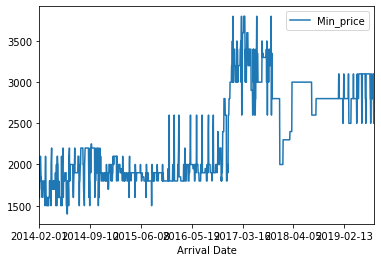

In [49]:
df1.plot()

In [50]:
df1.describe()

,Min_price
count,1320.000000
mean,2351.060606
std,560.399318
min,1400.000000
25%,1900.000000
50%,2100.000000
75%,2800.000000
max,3800.000000


In [51]:
df_blr.head()

,Arrival Date,Min_price
0,2014-02-01,1600
1,2014-03-01,2000
2,2014-04-01,1800
3,2014-07-01,2000
4,2014-08-01,2100


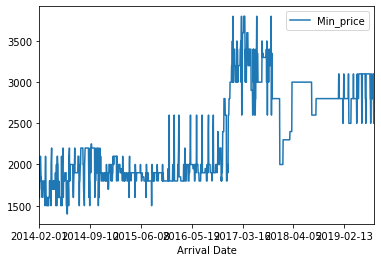

In [53]:
df2 = df_blr.set_index('Arrival Date')
df2.plot()

In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

In [71]:
train_size = int(len(scaled) * 0.80)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1056
test: 264


In [72]:
def split_test_train(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(df1)
    train_size = int(len(scaled) * 0.80)
    test_size = len(scaled - train_size)
    train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
    print('train: {}\ntest: {}'.format(len(train), len(test)))
    return train,test

In [73]:
train_mys,test_mys = split_test_train(df1)
train_blr,test_blr = split_test_train(df2)

train: 1056
test: 264
train: 1056
test: 264


In [74]:
def create_dataset(dataset, look_back=30):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [75]:
#look_back = 30
#X_train, y_train = create_dataset(train, look_back)
#X_test, y_test = create_dataset(test, look_back)

In [76]:
look_back = 27
X_train_mys, y_train_mys = create_dataset(train_mys, look_back)
X_test_mys, y_test_mys = create_dataset(test_mys, look_back)
X_train_blr, y_train_blr = create_dataset(train_blr, look_back)
X_test_blr, y_test_blr = create_dataset(test_blr, look_back)

1056 27
0
X 0 to 27
[0.08333333 0.25       0.16666667 0.25       0.29166667 0.25
 0.1875     0.1875     0.125      0.125      0.125      0.08333333
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.125
 0.125      0.08333333 0.08333333 0.16666667 0.04166667 0.25
 0.29166667 0.25       0.08333333]
Y 27
0.08333333333333337
1
X 1 to 28
[0.25       0.16666667 0.25       0.29166667 0.25       0.1875
 0.1875     0.125      0.125      0.125      0.08333333 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.125      0.125
 0.08333333 0.08333333 0.16666667 0.04166667 0.25       0.29166667
 0.25       0.08333333 0.08333333]
Y 28
0.08333333333333337
2
X 2 to 29
[0.16666667 0.25       0.29166667 0.25       0.1875     0.1875
 0.125      0.125      0.125      0.08333333 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.125      0.125      0.08333333
 0.08333333 0.16666667 0.04166667 0.25       0.29166667 0.25
 0.08333333 0.08333333 0.08333333]
Y 29
0.04166666666666663
3
X 3 to

[0.125      0.04166667 0.25       0.29166667 0.29166667 0.33333333
 0.08333333 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333
 0.04166667 0.04166667 0.04166667 0.         0.         0.16666667
 0.08333333 0.16666667 0.125     ]
Y 115
0.04166666666666663
89
X 89 to 116
[0.04166667 0.25       0.29166667 0.29166667 0.33333333 0.08333333
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.20833333
 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333 0.04166667
 0.04166667 0.04166667 0.         0.         0.16666667 0.08333333
 0.16666667 0.125      0.04166667]
Y 116
0.29166666666666674
90
X 90 to 117
[0.25       0.29166667 0.29166667 0.33333333 0.08333333 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.20833333 0.20833333
 0.20833333 0.20833333 0.20833333 0.20833333 0.04166667 0.04166667
 0.04166667 0.         0.         0.16666667 0.08333333 0.16666667
 0.125      0.04166667 0.29166667]
Y 117
0.2

X 253 to 280
[0.16666667 0.16666667 0.20833333 0.20833333 0.20833333 0.20833333
 0.20833333 0.16666667 0.16666667 0.20833333 0.16666667 0.25
 0.20833333 0.20833333 0.16666667 0.20833333 0.20833333 0.125
 0.125      0.125      0.16666667 0.25       0.25       0.25
 0.25       0.20833333 0.25      ]
Y 280
0.25
254
X 254 to 281
[0.16666667 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333
 0.16666667 0.16666667 0.20833333 0.16666667 0.25       0.20833333
 0.20833333 0.16666667 0.20833333 0.20833333 0.125      0.125
 0.125      0.16666667 0.25       0.25       0.25       0.25
 0.20833333 0.25       0.25      ]
Y 281
0.20833333333333337
255
X 255 to 282
[0.20833333 0.20833333 0.20833333 0.20833333 0.20833333 0.16666667
 0.16666667 0.20833333 0.16666667 0.25       0.20833333 0.20833333
 0.16666667 0.20833333 0.20833333 0.125      0.125      0.125
 0.16666667 0.25       0.25       0.25       0.25       0.20833333
 0.25       0.25       0.20833333]
Y 282
0.16666666666666663
256
X 256 to 2

 0.16666667 0.25       0.20833333]
Y 530
0.33333333333333337
504
X 504 to 531
[0.16666667 0.16666667 0.16666667 0.22916667 0.16666667 0.20833333
 0.25       0.5        0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.25       0.22916667 0.16666667
 0.25       0.20833333 0.33333333]
Y 531
0.5000000000000001
505
X 505 to 532
[0.16666667 0.16666667 0.22916667 0.16666667 0.20833333 0.25
 0.5        0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.25       0.22916667 0.16666667 0.25
 0.20833333 0.33333333 0.5       ]
Y 532
0.16666666666666663
506
X 506 to 533
[0.16666667 0.22916667 0.16666667 0.20833333 0.25       0.5
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.25       0.22916667 0.16666667 0.25

 0.20833333 0.25       0.25      ]
Y 702
0.25
676
X 676 to 703
[0.20833333 0.20833333 0.20833333 0.20833333 0.16666667 0.20833333
 0.25       0.25       0.41666667 0.5        0.20833333 0.20833333
 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333
 0.25       0.25       0.25       0.25       0.25       0.20833333
 0.25       0.25       0.25      ]
Y 703
0.41666666666666663
677
X 677 to 704
[0.20833333 0.20833333 0.20833333 0.16666667 0.20833333 0.25
 0.25       0.41666667 0.5        0.20833333 0.20833333 0.20833333
 0.20833333 0.20833333 0.20833333 0.20833333 0.20833333 0.25
 0.25       0.25       0.25       0.25       0.20833333 0.25
 0.25       0.25       0.41666667]
Y 704
0.25
678
X 678 to 705
[0.20833333 0.20833333 0.16666667 0.20833333 0.25       0.25
 0.41666667 0.5        0.20833333 0.20833333 0.20833333 0.20833333
 0.20833333 0.20833333 0.20833333 0.20833333 0.25       0.25
 0.25       0.25       0.25       0.20833333 0.25       0.25
 0.25       0.41666667 0.25 

[0.5        0.5        0.5        0.58333333 0.58333333 0.83333333
 0.66666667 0.875      1.         0.75       0.66666667 0.8125
 0.75       0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]
Y 875
0.6666666666666666
849
X 849 to 876
[0.5        0.5        0.58333333 0.58333333 0.83333333 0.66666667
 0.875      1.         0.75       0.66666667 0.8125     0.75
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]
Y 876
0.6666666666666666
850
X 850 to 877
[0.5        0.58333333 0.58333333 0.83333333 0.66666667 0.875
 1.         0.75       0.66666667 0.8125     0.75       0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]
Y 877
0.87500000000000

 0.58333333 0.58333333 0.58333333]
Y 51
0.5833333333333334
25
X 25 to 52
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333]
Y 52
0.5833333333333334
26
X 26 to 53
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333]
Y 53
0.5833333333333334
27
X 27 to 54
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.5833333

 0.58333333 0.58333333 0.58333333]
Y 258
0.7083333333333334
232
X 232 to 259
[0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.58333333 0.58333333 0.45833333
 0.58333333 0.70833333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.70833333]
Y 259
0.5833333333333334
233
X 233 to 260
[0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.58333333 0.58333333 0.45833333 0.58333333
 0.70833333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.70833333 0.58333333]
Y 260
0.5833333333333334
234
X 234 to 261
[0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.58333333 0.58333333 0.45833333 0.58333333 0.70833333
 0.58333333 0.58333333 0.5833333

 0.33333333 0.33333333 0.33333333]
Y 214
0.33333333333333337
188
X 188 to 215
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.1875     0.08333333 0.16666667 0.16666667 0.04166667 0.25
 0.33333333 0.33333333 0.20833333 0.33333333 0.35416667 0.35416667
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]
Y 215
0.33333333333333337
189
X 189 to 216
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.1875
 0.08333333 0.16666667 0.16666667 0.04166667 0.25       0.33333333
 0.33333333 0.20833333 0.33333333 0.35416667 0.35416667 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]
Y 216
0.33333333333333337
190
X 190 to 217
[0.33333333 0.33333333 0.33333333 0.33333333 0.1875     0.08333333
 0.16666667 0.16666667 0.04166667 0.25       0.33333333 0.33333333
 0.20833333 0.33333333 0.35416667 0.35416667 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.333

X 405 to 432
[0.1875     0.1875     0.1875     0.1875     0.1875     0.1875
 0.1875     0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.20833333 0.08333333 0.25       0.25
 0.20833333 0.20833333 0.16666667 0.16666667 0.20833333 0.20833333
 0.16666667 0.16666667 0.16666667]
Y 432
0.16666666666666663
406
X 406 to 433
[0.1875     0.1875     0.1875     0.1875     0.1875     0.1875
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.20833333 0.08333333 0.25       0.25       0.20833333
 0.20833333 0.16666667 0.16666667 0.20833333 0.20833333 0.16666667
 0.16666667 0.16666667 0.16666667]
Y 433
0.16666666666666663
407
X 407 to 434
[0.1875     0.1875     0.1875     0.1875     0.1875     0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.20833333 0.08333333 0.25       0.25       0.20833333 0.20833333
 0.16666667 0.16666667 0.20833333 0.20833333 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667]
Y 434


Y 636
0.25
610
X 610 to 637
[0.25       0.16666667 0.16666667 0.25       0.25       0.20833333
 0.25       0.20833333 0.25       0.5        0.25       0.25
 0.25       0.25       0.25       0.20833333 0.20833333 0.20833333
 0.20833333 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.25      ]
Y 637
0.25
611
X 611 to 638
[0.16666667 0.16666667 0.25       0.25       0.20833333 0.25
 0.20833333 0.25       0.5        0.25       0.25       0.25
 0.25       0.25       0.20833333 0.20833333 0.20833333 0.20833333
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.25       0.25      ]
Y 638
0.20833333333333337
612
X 612 to 639
[0.16666667 0.25       0.25       0.20833333 0.25       0.20833333
 0.25       0.5        0.25       0.25       0.25       0.25
 0.25       0.20833333 0.20833333 0.20833333 0.20833333 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.25       0.25       0.20833333]
Y 639
0.25
613
X

 0.83333333 0.83333333 0.75      ]
Y 847
0.8125000000000001
821
X 821 to 848
[0.91666667 0.75       0.75       0.75       0.75       0.83333333
 0.83333333 0.75       0.8125     0.83333333 0.83333333 0.83333333
 0.83333333 0.625      0.625      0.625      0.625      0.625
 0.625      0.5        0.5        0.83333333 0.66666667 0.83333333
 0.83333333 0.75       0.8125    ]
Y 848
0.5000000000000001
822
X 822 to 849
[0.75       0.75       0.75       0.75       0.83333333 0.83333333
 0.75       0.8125     0.83333333 0.83333333 0.83333333 0.83333333
 0.625      0.625      0.625      0.625      0.625      0.625
 0.5        0.5        0.83333333 0.66666667 0.83333333 0.83333333
 0.75       0.8125     0.5       ]
Y 849
0.5000000000000001
823
X 823 to 850
[0.75       0.75       0.75       0.83333333 0.83333333 0.75
 0.8125     0.83333333 0.83333333 0.83333333 0.83333333 0.625
 0.625      0.625      0.625      0.625      0.625      0.5
 0.5        0.83333333 0.66666667 0.83333333 0.83333333 0.75

 0.58333333 0.58333333 0.58333333]
Y 40
0.5833333333333334
14
X 14 to 41
[0.66666667 0.66666667 0.66666667 0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333]
Y 41
0.5833333333333334
15
X 15 to 42
[0.66666667 0.66666667 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333]
Y 42
0.5833333333333334
16
X 16 to 43
[0.66666667 0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333 0.58333333
 0.58333333 0.58333333 0.58333333]
Y 43


226
X 226 to 253
[0.70833333 0.70833333 0.58333333 0.58333333 0.45833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.58333333 0.58333333 0.45833333
 0.58333333 0.70833333 0.58333333]
Y 253
0.5833333333333334
227
X 227 to 254
[0.70833333 0.58333333 0.58333333 0.45833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.58333333 0.58333333 0.45833333 0.58333333
 0.70833333 0.58333333 0.58333333]
Y 254
0.5833333333333334
228
X 228 to 255
[0.58333333 0.58333333 0.45833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333 0.70833333
 0.70833333 0.58333333 0.58333333 0.45833333 0.58333333 0.70833333
 0.58333333 0.58333333 0.

In [77]:
X_train_mys = np.reshape(X_train_mys, (X_train_mys.shape[0], X_train_mys.shape[1], 1))
X_test_mys = np.reshape(X_test_mys, (X_test_mys.shape[0], X_test_mys.shape[1], 1))
print(X_train_mys.shape)
print(X_test_mys.shape)
X_train_blr = np.reshape(X_train_blr, (X_train_blr.shape[0], X_train_blr.shape[1], 1))
X_test_blr = np.reshape(X_test_blr, (X_test_blr.shape[0], X_test_blr.shape[1], 1))
print(X_train_blr.shape)
print(X_test_blr.shape)

(1028, 27, 1)
(236, 27, 1)
(1028, 27, 1)
(236, 27, 1)


In [78]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#print(X_train.shape)
#print(X_test.shape)

In [79]:
batch_size = 2
model = Sequential()
model.add(LSTM(units=100, batch_input_shape=(batch_size, look_back, 1), stateful=True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (2, 100)                  40800     
_________________________________________________________________
dense_3 (Dense)              (2, 1)                    101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(X_train_mys, y_train_mys, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 20s - loss: 0.0092
Epoch 2/50
 - 15s - loss: 0.0066
Epoch 3/50
 - 16s - loss: 0.0058
Epoch 4/50
 - 19s - loss: 0.0055
Epoch 5/50
 - 16s - loss: 0.0055
Epoch 6/50
 - 15s - loss: 0.0056
Epoch 7/50
 - 15s - loss: 0.0054
Epoch 8/50
 - 15s - loss: 0.0055
Epoch 9/50
 - 15s - loss: 0.0054
Epoch 10/50
 - 15s - loss: 0.0052
Epoch 11/50
 - 16s - loss: 0.0054
Epoch 12/50
 - 16s - loss: 0.0055
Epoch 13/50
 - 16s - loss: 0.0051
Epoch 14/50
 - 16s - loss: 0.0051
Epoch 15/50
 - 17s - loss: 0.0053
Epoch 16/50
 - 19s - loss: 0.0052
Epoch 17/50
 - 16s - loss: 0.0052
Epoch 18/50
 - 16s - loss: 0.0052
Epoch 19/50
 - 17s - loss: 0.0050
Epoch 20/50
 - 19s - loss: 0.0051
Epoch 21/50
 - 18s - loss: 0.0051
Epoch 22/50
 - 19s - loss: 0.0050
Epoch 23/50
 - 20s - loss: 0.0050
Epoch 24/50
 - 18s - loss: 0.0051
Epoch 25/50
 - 18s - loss: 0.0049
Epoch 26/50
 - 16s - loss: 0.0048
Epoch 27/50
 - 16s - loss: 0.0050
Epoch 28/50
 - 16s - loss: 0.0049
Epoch 29/50
 - 17s - loss: 0.0049
Epoch 30/50
 - 17s - lo

In [85]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train_mys, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test_mys, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train_mys])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test_mys])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 162.79 RMSE
Test Score: 119.78 RMSE


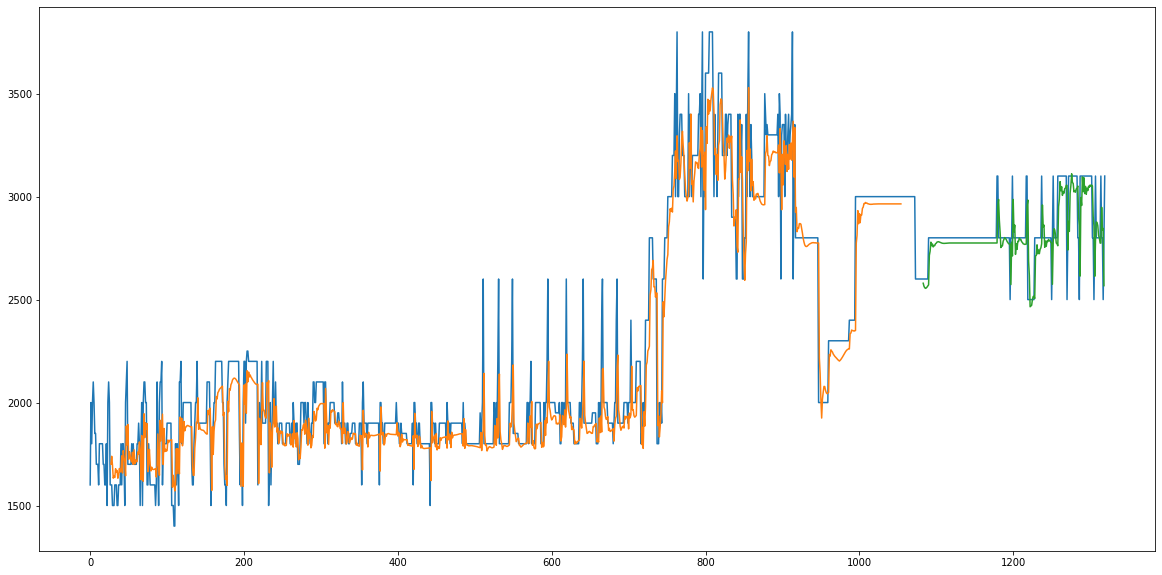

In [86]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [87]:
model.fit(X_train_blr, y_train_blr, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 16s - loss: 0.0045
Epoch 2/50
 - 16s - loss: 0.0044
Epoch 3/50
 - 16s - loss: 0.0043
Epoch 4/50
 - 16s - loss: 0.0043
Epoch 5/50
 - 15s - loss: 0.0044
Epoch 6/50
 - 15s - loss: 0.0043
Epoch 7/50
 - 16s - loss: 0.0050
Epoch 8/50
 - 15s - loss: 0.0042
Epoch 9/50
 - 15s - loss: 0.0043
Epoch 10/50
 - 15s - loss: 0.0042
Epoch 11/50
 - 15s - loss: 0.0042
Epoch 12/50
 - 15s - loss: 0.0043
Epoch 13/50
 - 16s - loss: 0.0041
Epoch 14/50
 - 15s - loss: 0.0043
Epoch 15/50
 - 15s - loss: 0.0042
Epoch 16/50
 - 18s - loss: 0.0043
Epoch 17/50
 - 15s - loss: 0.0042
Epoch 18/50
 - 14s - loss: 0.0042
Epoch 19/50
 - 15s - loss: 0.0041
Epoch 20/50
 - 14s - loss: 0.0042
Epoch 21/50
 - 15s - loss: 0.0042
Epoch 22/50
 - 15s - loss: 0.0041
Epoch 23/50
 - 15s - loss: 0.0041
Epoch 24/50
 - 16s - loss: 0.0041
Epoch 25/50
 - 19s - loss: 0.0041
Epoch 26/50
 - 15s - loss: 0.0040
Epoch 27/50
 - 15s - loss: 0.0040
Epoch 28/50
 - 17s - loss: 0.0040
Epoch 29/50
 - 17s - loss: 0.0040
Epoch 30/50
 - 15s - lo

In [89]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train_blr, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test_blr, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train_blr])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test_blr])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 171.15 RMSE
Test Score: 164.55 RMSE


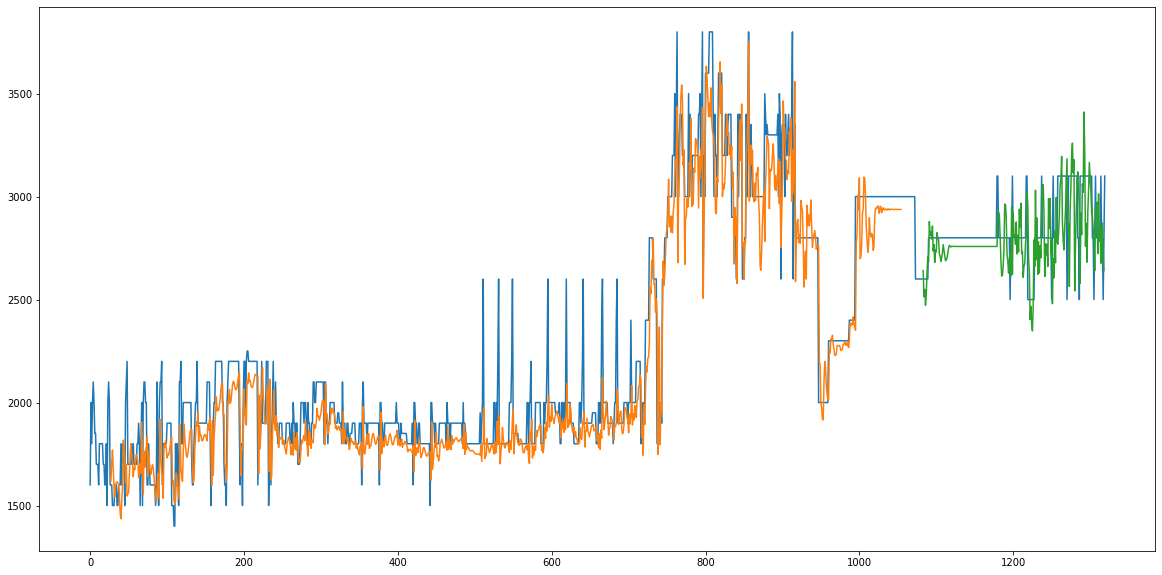

In [90]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
def priceEstimate():
    preprocessing()
    sclaing()
    split_test_train()
    create_data_set()
    reshape()
    model()
    error()
    graph()
